<a href="https://colab.research.google.com/github/nayun12/Tobigs_17/blob/main/%5B%ED%88%AC%EB%B9%85%EC%8A%A4_17%EA%B8%B0_%EC%A0%95%EA%B7%9C%EC%84%B8%EC%85%98%5D_2%EC%A3%BC%EC%B0%A8_Regression_%EA%B3%BC%EC%A0%9C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [ ]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [ ]:
# Load Data 
data = pd.read_csv("/content/drive/MyDrive/Tobigs/2주차 Regression/assignment2_data.csv",index_col=0)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# 데이터 전처리

1. Mileage, Engine, power Data는 단위 문자열 제거
2. New Price Data는 단위를 통일 후 문자열 제거

In [ ]:
data['Mileage'] = data.Mileage.map(lambda x : float(str(x).split()[0]))
data['Engine'] = data.Engine.map(lambda x : float(str(x).split()[0]))
data['Power'] = data.Power.map(lambda x : str(x).split()[0]).map(lambda x : float(x) if x != "null" else np.nan)


In [ ]:
def get_New_Price(x):
    x = str(x)
    if x == 'nan' : return np.nan
    x_list = x.split()
    if x_list[1] == "Lakh": return float(x_list[0])
    return float(x_list[0]) * 100

data['New_Price'] = data['New_Price'].map(lambda x : get_New_Price(x))


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 658.3+ KB


name Data 칼럼을 보면 회사와 모델명을 공백을 기준으로 분리할 수 있다. 모델 명은 차종마다 다르므로 분석에 용이하지 않은 데이터라고 생각하므로 브랜드 데이터 칼럼을 새로 만들고, Name 칼럼을 삭제한다.



In [ ]:
data['Brand'] = data.Name.map(lambda x : x.split()[0])

In [ ]:
del data["Name"]

In [ ]:
data[:10]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi
5,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,NaN,2.35,Hyundai
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,3.50,Nissan
7,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21.00,17.50,Toyota
8,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.20,Volkswagen
9,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,NaN,1.95,Tata


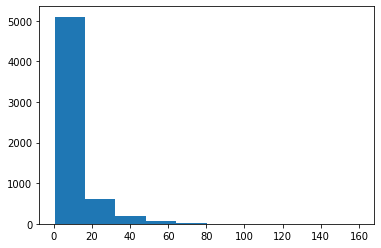

In [ ]:
# target 변수인 price의 분포를 먼저 살펴본다.
from matplotlib import pyplot as plt
plt.hist(data['Price'])
plt.show()

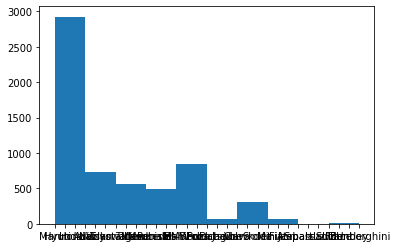

In [ ]:
plt.hist(data['Brand'])
plt.show()

# 결측치 처리

1. Mileage
2. Engine
3. Power
4. New_Price


In [ ]:
# 결측치 대체
data['New_Price'] = data['New_Price'].fillna(0)

In [ ]:
# 결측치 제거
data = data.dropna()

In [ ]:
# 범주형변수 원핫인코딩

col = ['Brand', 'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']
data = pd.get_dummies(data, columns=col)


Model 제작
- Linear Regression

In [ ]:
data

,Kilometers_Driven,Mileage,Engine,Power,New_Price,Price,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,72000,26.60,998.0,58.16,0.00,1.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
1,41000,19.67,1582.0,126.20,0.00,12.50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
2,46000,18.20,1199.0,88.70,8.61,4.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
3,87000,20.77,1248.0,88.76,0.00,6.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
4,40670,15.20,1968.0,140.80,0.00,17.74,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365,28.40,1248.0,74.00,7.88,4.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
6015,100000,24.40,1120.0,71.00,0.00,4.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
6016,55000,14.00,2498.0,112.00,0.00,2.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
6017,46000,18.90,998.0,67.10,0.00,2.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X = data[data.columns.difference(['Price'])]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4697, 86), (4697,), (1175, 86), (1175,))

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

In [ ]:
intercept = lr.intercept_
coef = lr.coef_
print(f'절편은 {intercept}, \n 기울기는 \n {coef}')

절편은 -236269717.93140772, 
 기울기는 
 [ 2.36269722e+08  2.36269729e+08  2.36269728e+08  2.36269733e+08
  2.36269719e+08  2.36269717e+08  2.36269719e+08  2.36269717e+08
  2.36269720e+08  2.36269719e+08  2.36269720e+08  2.36269714e+08
  2.36269714e+08  2.36269737e+08  2.36269718e+08  2.36269781e+08
  2.36269740e+08  2.36269715e+08  2.36269720e+08  2.36269730e+08
  2.36269730e+08  2.36269717e+08  2.36269720e+08  2.36269738e+08
  2.36269719e+08  2.36269719e+08  2.36269717e+08  2.36269720e+08
  2.36269719e+08  2.36269724e+08  1.59440935e-03 -2.53244296e-01
  2.13445365e-01  1.37086529e+00 -1.33101819e+00  3.12924385e-06
 -6.05673485e-01  1.77045876e+00  7.63749421e-01  1.11575127e+00
 -7.86928814e-01  9.57076780e-01  2.33728129e-01 -1.26148009e+00
 -1.31732561e+00 -8.31084862e-01 -3.80998626e-02 -2.04469860e-01
  1.30348407e-01  7.00969934e-01 -9.09232257e-01 -9.43911709e-02
  3.02648053e-01  6.66805804e-02 -4.27587545e+00  1.54922956e+01
  2.35458352e+00 -3.42904261e+00 -9.71682772e-01 -1.8641

Text(0.5, 1.0, 'Linear Regression feature importace')

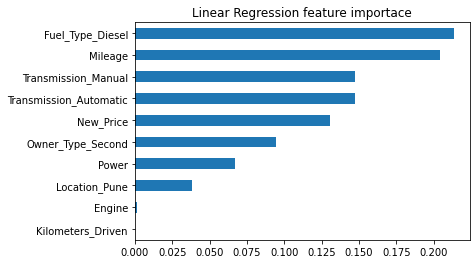

In [ ]:
# 상위 10개의 중요 픽쳐
features = abs(pd.Series(index = X_train.columns, data = lr.coef_)).sort_values(ascending=True)
features[:10].plot.barh()
plt.title('Linear Regression feature importace')

In [ ]:
from sklearn.metrics import mean_squared_error # MSE
# R-squared
print('Linear Regression train R-squared: ',lr.score(X_train, y_train))
print('Linear Regression test R-squared : ',lr.score(X_test, y_test))
# MSE
print('Linear Regression train MSE      : ',mean_squared_error(y_train, lr_pred_train))
print('Linear Regression test MSE       : ',mean_squared_error(y_test, lr_pred_test))

Linear Regression train R-squared:  0.8142088048162471
Linear Regression test R-squared :  0.8000146851837103
Linear Regression train MSE      :  24.269407021311117
Linear Regression test MSE       :  22.013714729433396
